In [1]:
import numpy as np
import jax
import jax.numpy as jnp
import chex
from functools import partial
from typing import Callable
import os
from exciting_environments import PMSM
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE=5
new_motor_env = PMSM(
    saturated=True,
    batch_size=BATCH_SIZE)
PRNGKey = jax.vmap(jax.random.PRNGKey)(np.random.randint(0, 2**31, size=(BATCH_SIZE,)))

In [10]:
obs, motor_env_state = new_motor_env.reset() #PRNGKey
next_state=motor_env_state
i_dqs=[]
for _ in range(1000):
    act=jnp.repeat(jnp.array([0.03,0.03])[:,None],BATCH_SIZE,axis=1).T
    obs_next,next_state=new_motor_env.vmap_step(next_state,act)
    i_dqs.append(obs_next[0,0:2])

In [11]:
obs_next,next_state=new_motor_env.vmap_step(next_state,act)

In [12]:
obs_next

Array([[-0.48973963, -0.05108379,  1.        , -0.0197883 ,  0.99950624,
         0.03142076,  0.0285535 ,  0.03137989],
       [-0.48973963, -0.05108379,  1.        , -0.0197883 ,  0.99950624,
         0.03142076,  0.0285535 ,  0.03137989],
       [-0.48973963, -0.05108379,  1.        , -0.0197883 ,  0.99950624,
         0.03142076,  0.0285535 ,  0.03137989],
       [-0.48973963, -0.05108379,  1.        , -0.0197883 ,  0.99950624,
         0.03142076,  0.0285535 ,  0.03137989],
       [-0.48973963, -0.05108379,  1.        , -0.0197883 ,  0.99950624,
         0.03142076,  0.0285535 ,  0.03137989]], dtype=float32)

Text(0, 0.5, 'i_q')

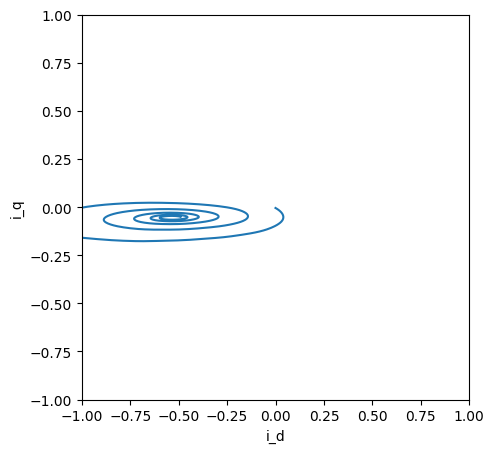

In [13]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(jnp.array(i_dqs)[:,0],jnp.array(i_dqs)[:,1]) #,label="currents"
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_xlabel("i_d")
ax.set_ylabel("i_q")
#ax.legend()

### PMSM with GymWrapper

In [14]:
from exciting_environments import GymWrapper

In [15]:
BATCH_SIZE=5
new_motor_env = PMSM(
    batch_size=BATCH_SIZE,
    saturated=True)
gym_pmsm= GymWrapper(env=new_motor_env)

No chosen control state. Control state is set to [].


In [18]:
gym_pmsm.reset()
i_dqs2=[]
for _ in range(1000):
    act=jnp.repeat(jnp.array([0.03,0.03])[:,None],BATCH_SIZE,axis=1).T
    obs_next,_,_,_=gym_pmsm.step(act)
    i_dqs2.append(obs_next[0,0:2])

Text(0, 0.5, 'i_q')

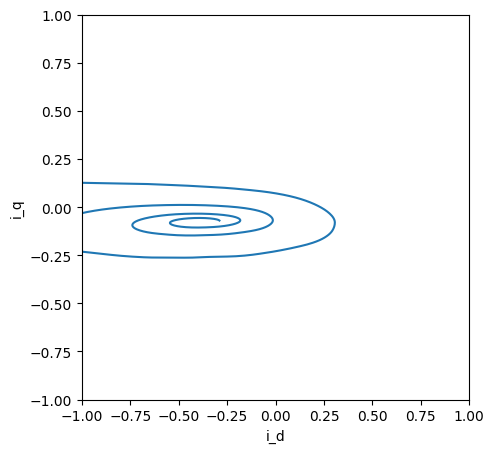

In [19]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(jnp.array(i_dqs2)[:,0],jnp.array(i_dqs2)[:,1]) #,label="currents"
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_xlabel("i_d")
ax.set_ylabel("i_q")
#ax.legend()